Introduction to Artificial Intelligence - Supervised Learning lab Session Part 1a
--
At the end of this session, you will be able to : 
- Perform basic supervised learning tasks using sklearn.
- Apply supervised learning on PyRat datasets to predict the winner from the start configuration

In [1]:
# The tqdm package is useful to visualize progress with long computations. 
# Install it using pip. 
import tqdm
import numpy as np
import ast
import os
import sys

Basics of machine learning using sklearn
--

sklearn is a very powerful package that implements most machine learning methods. sklearn also includes cross-validation procedures in order to prevent overfitting, many useful metrics and data manipulation techniques that enables very careful experimentations with machine learning. It is also very straightforward to use. We will introduce a few basic concepts of sklearn. 

First, it is very easy to simulate data with sklearn. 

In [2]:
from sklearn.datasets import make_blobs

Use the function make_blobs to generate clouds of points with $d=2$, and visualize them using the function scatter from matplotlib.pyplot. You can generate as many samples as you want.You can generate several clouds of points using the argument centers. We recommend using random_state=0 so that your results are from the same distribution as our tests.

Vocabulary : n_samples is the number of generated samples, n_features is $d$ (number of dimensions), centers is the number of classes. 

Hint : you can use the output "y" as an argument for the color argument ("c") of the scatter function.

In [3]:
### CELL TO BE COMPLETED - Generate blobs.
X, y = make_blobs(n_samples=10000, centers=4, n_features=2,
                        random_state=0)

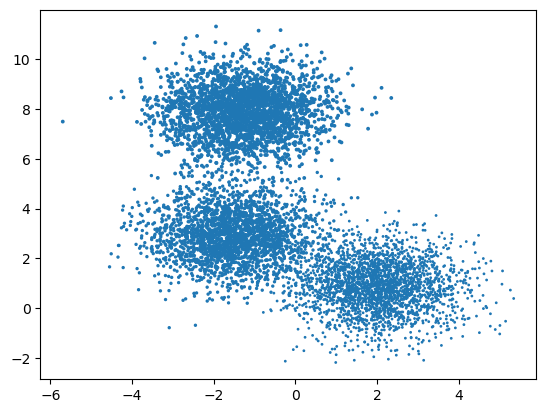

In [4]:
### CELL TO BE COMPLETED - Plot.
### Don't forget to import pyplot and use %matplotlib inline.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X[:, 0], X[:, 1], y)
plt.show()

You can use other arguments from make_blobs in order to change the variance of the blobs, or the coordinates of their center. You can also experiment on higher dimension, although it becomes difficult to visualize. 

sklearn has many other data generators, as well as ways to load standard datasets of various sizes. Check them out here: 

http://scikit-learn.org/stable/datasets


Now that we have generated a simple dataset, let's try to do a basic supervised learning approach. 

First, in order to mesure the ability of the model to generalize, we have to split the dataset into a training set and a test set. The test set is the part of the dataset that the model will not see during the training and will be used as a proxy for your "real world" examples.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*u03UsvBGwkYD4E7BObpcaw.png"></center>
<center><small>Image taken from https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8</small></center>

In sklearn, you can use the train_test_split function to split datasets.

Try to split the dataset you previously generated (the blobs) into x_train, x_test, y_train, y_test, with 80% in x_train and 20% in x_test. Set random_state = 0 so that the function always returns the same split.

In [5]:
#### CELL TO BE COMPLETED 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=0)

Check the shapes of the generated vectors.

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

Let's use a K-Nearest Neighbor classifier to test whether we can classify this dataset. Create a <b>classifier</b>, train it using your <b> training set </b> and evaluate it by its <b>accuracy</b> on both <b>the train and test sets</b>. 

In K-Nearest Neighbor classification (also known as KNN), when you want to predict the class of an object, you look at the K (an hyperparameter) nearest examples from the training (using a distance metric, in our case the euclidean distance). This object is then classified by a majority vote among its neighbors. In other words, the class of the object is the most common class among its neighbours.

To use a Nearest Neighbor with sklearn, you have to use the class [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

The sklearn API is consistent. This means that for almost every method they propose you can train it using [object.fit](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit), you can use it to make prediction with [object.predict](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) and finally verify the <b>accuracy</b> of the method using [object.score](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score).

In [7]:
### CELL TO BE COMPLETED - Train the classifier and get the accuracy in both sets.
from sklearn.neighbors import KNeighborsClassifier

def k_classifier_accuracies(k):
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
    classifier.fit(x_train, y_train)
    
    
    train_accuracy = classifier.score(x_train, y_train)
    # print(f'Train accuracy is {train_accuracy}')
    
    test_accuracy = classifier.score(x_test, y_test)
    # print(f'Test accuracy is {test_accuracy}')
    return train_accuracy, test_accuracy

k_classifier_accuracies(1)

c:\Users\Moi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Moi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

(1.0, 0.907)

Your classifier should have a train accuracy of 1, while the test accuracy should be high but not perfect.

This is caused by the bias-variance trade-off. The 1-NN classifier always has a bias of 0 (it perfectly classifies the training set) but it has a high variance given that having one more example in the training set can completely change a decision.

Try to avoid having such a high variance, test different values of k and plot the accuracies given the different values of the hyperparameter k. 

If you have time, we advise you to do the same analysis but varying the train/test split size.

In [8]:
# CELL TO BE COMPLETED - Train networks with varying k.
test_ks = range(1,25)  # list containing values of k to be tested
accuracies = [k_classifier_accuracies(k) for k in test_ks]
train_acc_p = [accuracy[0] for accuracy in accuracies]
test_acc_p = [accuracy[1] for accuracy in accuracies]

c:\Users\Moi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Moi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

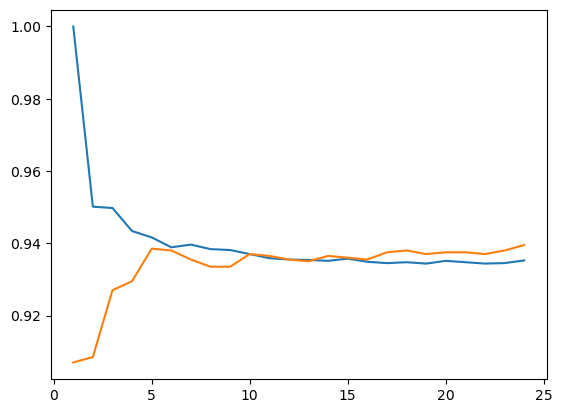

In [9]:
plt.plot(test_ks, train_acc_p)
plt.plot(test_ks, test_acc_p)

Once your classifier is trained, and bias-variance analysed, it is time to look at other metrics based on your results. It is important to remember that accuracy is a key metric, but it is not the <b> only </b> metric you should be focusing on.

Print a [classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) and a [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for both training and test sets.

In the classification report, you are going to see 3 new metrics. They are really important because the accuracy does not show a complete portrait of your results.

* Precision: Percentage of correctly classified examples with respect to all retrieved examples
* Recall: Percentage of correctly classified examples with respect to all examples belonging to a given class
* F1 Score: Harmonic mean from precision and recall.

In [10]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.
from sklearn.metrics import classification_report,confusion_matrix
k = 5
classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       469
           1       0.97      0.96      0.96       518
           2       0.92      0.90      0.91       504
           3       0.97      0.98      0.98       509

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

[[423   9  29   8]
 [ 16 499   3   0]
 [ 34   9 455   6]
 [  4   0   5 500]]


c:\Users\Moi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Finally, you are going to plot the decision boundaries of our model. Use the function plot_boundaries given below. You can only do this if the tensor representing your data is two dimensional.

This function will test our model with values ranging from the smallest x to the highest x and from the lowest y to the highest y, each varying by $h$ and plot it nicely. [Link to the original implementation.](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

c:\Users\Moi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


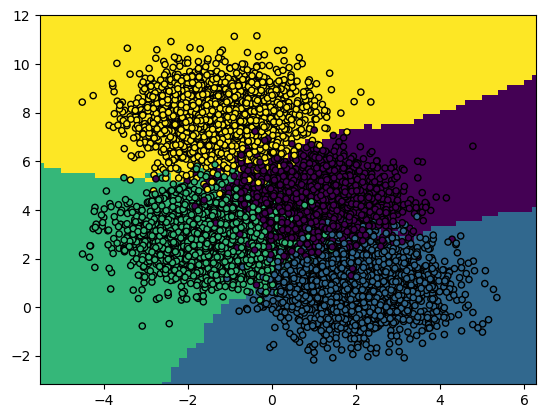

In [11]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

Predicting the winner in PyRat based on the initial cheese configuration
--

Use the code from lab1 in order to generate a PyRat dataset (X,y) of initial cheese configuration X each corresponding to a label of winner in y. 

The goal of the next part is to perform supervised learning on this dataset using a KNN classifier, as done above. Use the same metrics to estimate the performance of the classifier. 

We suggest that you start with a rather small maze, as the problem gets really high to solve in high dimensions.


In [12]:
import sys     # These lines correct a bug occuring in Notebooks.
sys.argv=['']  # It's not perfect, but it works.

import os
lab_commons_path = os.path.join(os.getcwd(), "..", "..")
if lab_commons_path not in sys.path:
    sys.path.append(lab_commons_path)

import lab_commons.make_2_player_matches as simulations
import lab_commons.AI.greedy as greedy_player
import lab_commons.AI.random as random_player
import lab_commons.AI.second_greedy as second_greedy_player

program_1 = greedy_player 
program_2 = second_greedy_player # You may want to test with the random player.

As for Lab1, you can run several games with the following function, by specifying the number of desired games with `nb_games` and the maze dimensions and number of cheeses

In [107]:
nb_games = 500

nb_cheese = 2
maze_width = 5
maze_height = 7

_, cheeses_1000_games, winners_1000_games = simulations.run_several_games(program_1, program_2, nb_cheese = nb_cheese,
                                                                  maze_width = maze_width, maze_height = maze_height, 
                                                                  nb_games = nb_games)

#print(f"Cheeses matrix: {cheeses_10_games}")
#print(f"Winners: {winners_1000_games}")

Game:  86%|████████▌ | 429/500 [51:29<06:50,  5.78s/it] 

In [ ]:
print(winners_1000_games.count(0.0))
print(winners_1000_games.count(1.0))
print(winners_1000_games.count(-1.0))

You can use the `simulations` function to generate a dataset with the desired nb_cheese and maze dimensions and do more tests. However, as a start, you can also use the datasets we generated for you in Lab1.

In [13]:
### CELL TO BE COMPLETED 
# Load maze configuration and winners data from Lab1
cheeses_npz = np.load("../../session1/lab/cheeses_500_games_5x7_4.npz")
X = cheeses_npz["data"]
winners_npz = np.load("../../session1/lab/winners_500_games_5x7_4.npz")
Y = winners_npz["data"]
print(f"Shape of X matrix: {X.shape},\nY matrix: {Y}")

Shape of X matrix: (500, 35),
Y matrix: [ 0.  0.  0. -1. -1.  0.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0. -1.  0.
 -1. -1.  1.  0. -1. -1.  0.  0.  0.  0.  1. -1.  0.  1.  1. -1.  1. -1.
  1.  1.  1. -1. -1.  0. -1.  0.  0.  1.  0.  1.  0.  1.  0. -1. -1.  0.
  0.  1.  0.  0. -1. -1. -1.  0. -1. -1.  0.  0.  1.  0.  0.  1.  0. -1.
  1. -1.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  1. -1.  0.  1.
  0.  0.  0.  0.  1. -1. -1.  0.  0.  0.  0.  0. -1. -1.  0.  0. -1. -1.
  0.  1.  0. -1.  0. -1.  0. -1.  0. -1.  0.  0. -1. -1. -1.  0.  0. -1.
  0.  0.  1. -1.  0.  1.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  1. -1.
  0. -1.  1.  0.  1.  0. -1.  0.  1.  1. -1. -1. -1.  0. -1.  0.  0.  0.
 -1.  0.  1.  0.  0. -1.  1.  0. -1. -1.  1.  0.  0.  0.  1.  1.  1.  1.
  0. -1.  1.  1.  1.  0. -1.  0.  1. -1. -1. -1. -1.  0.  1.  0.  0. -1.
 -1. -1. -1.  0.  0.  0.  0.  0. -1. -1.  0.  0. -1. -1. -1.  1.  1.  1.
 -1.  1. -1.  0.  1. -1.  1. -1. -1.  0.  0. -1.  1.  0. -1.  0.  1.  1.
 -1.  0.  0

In [14]:
### CELL TO BE COMPLETED 
# split dataset in train and test set
# X = cheeses_1000_games
# Y = winners_1000_games
x_train, x_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.33, random_state=0)

In [15]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [16]:
dt = DecisionTreeClassifier(max_depth=4, random_state=0)
dt.fit(x_train, y_train)

def decision_tree_accuracies():
    print("-- decision tree without adaboost --")
    y_pred = dt.predict(x_test)
    
    train_accuracy = dt.score(x_train, y_train)
    print(f'Train accuracy is {train_accuracy}')
    
    test_accuracy = dt.score(x_test, y_test)
    print(f'Test accuracy is {test_accuracy}')
    return train_accuracy, test_accuracy, y_pred

def adaboost_decision_tree_accuracies():
    print("-- decision tree with adaboost --")
    ada_boost = AdaBoostClassifier(base_estimator=dt, n_estimators=55, learning_rate=0.2, random_state=42)

    ada_boost.fit(x_train, y_train)
    
    y_pred = ada_boost.predict(x_test)
    
    train_accuracy = ada_boost.score(x_train, y_train)
    print(f'Train accuracy is {train_accuracy}')
    
    test_accuracy = ada_boost.score(x_test, y_test)
    print(f'Test accuracy is {test_accuracy}')
    return train_accuracy, test_accuracy, y_pred, ada_boost


In [17]:
train_accuracy_dt_without, test_accuracy_dt_without, y_pred_without_adaboost_dt = decision_tree_accuracies()
train_accuracy_dt_with, test_accuracy_dt_with, y_pred_dt, adaboost_svc = adaboost_decision_tree_accuracies()

print(classification_report(y_test, y_pred_without_adaboost_dt))
print(confusion_matrix(y_test, y_pred_without_adaboost_dt))

print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


-- decision tree without adaboost --
Train accuracy is 0.5492537313432836
Test accuracy is 0.45454545454545453
-- decision tree with adaboost --
Train accuracy is 0.9940298507462687
Test accuracy is 0.5818181818181818
              precision    recall  f1-score   support

        -1.0       0.43      0.81      0.56        52
         0.0       0.47      0.21      0.29        73
         1.0       0.51      0.45      0.48        40

    accuracy                           0.45       165
   macro avg       0.47      0.49      0.44       165
weighted avg       0.47      0.45      0.42       165

[[42  6  4]
 [45 15 13]
 [11 11 18]]
              precision    recall  f1-score   support

        -1.0       0.76      0.50      0.60        52
         0.0       0.56      0.62      0.59        73
         1.0       0.49      0.62      0.55        40

    accuracy                           0.58       165
   macro avg       0.61      0.58      0.58       165
weighted avg       0.61      0.58     

In [18]:
svc = SVC(C=0.3, probability=True, random_state=0)
svc.fit(x_train, y_train)

def svc_accuracies():
    print("-- svc without adaboost --")
    y_pred = svc.predict(x_test)
    
    train_accuracy = svc.score(x_train, y_train)
    print(f'Train accuracy is {train_accuracy}')
    
    test_accuracy = svc.score(x_test, y_test)
    print(f'Test accuracy is {test_accuracy}')
    return train_accuracy, test_accuracy, y_pred

def adaboost_svc_accuracies():
    print("-- svc with adaboost --")
    ada_boost = AdaBoostClassifier(base_estimator=svc, n_estimators=10, learning_rate=0.01, random_state=42)

    ada_boost.fit(x_train, y_train)
    
    y_pred = ada_boost.predict(x_test)
    
    train_accuracy = ada_boost.score(x_train, y_train)
    print(f'Train accuracy is {train_accuracy}')
    
    test_accuracy = ada_boost.score(x_test, y_test)
    print(f'Test accuracy is {test_accuracy}')
    return train_accuracy, test_accuracy, y_pred, ada_boost


In [19]:
train_accuracy_svc_without, test_accuracy_svc_without, y_pred_without_adaboost_svc = svc_accuracies()
train_accuracy_svc_with, test_accuracy_svc_with, y_pred_svc, adaboost_dt = adaboost_svc_accuracies()

print(classification_report(y_test, y_pred_without_adaboost_svc))
print(confusion_matrix(y_test, y_pred_without_adaboost_svc))

print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

-- svc without adaboost --
Train accuracy is 0.5134328358208955
Test accuracy is 0.43636363636363634
-- svc with adaboost --
Train accuracy is 0.8716417910447761
Test accuracy is 0.6181818181818182
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        52
         0.0       0.44      0.96      0.60        73
         1.0       1.00      0.05      0.10        40

    accuracy                           0.44       165
   macro avg       0.48      0.34      0.23       165
weighted avg       0.44      0.44      0.29       165

[[ 0 52  0]
 [ 3 70  0]
 [ 0 38  2]]
              precision    recall  f1-score   support

        -1.0       0.71      0.56      0.62        52
         0.0       0.58      0.67      0.62        73
         1.0       0.62      0.60      0.61        40

    accuracy                           0.62       165
   macro avg       0.63      0.61      0.62       165
weighted avg       0.63      0.62      0.62       165

[[2

In [20]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(x_train, y_train)



# Random Forest Classifier without AdaBoost
def rfc_accuracies():
    print("-- Random Forest Classifier without AdaBoost --")
    y_pred = rfc.predict(x_test)
    
    train_accuracy = rfc.score(x_train, y_train)
    print(f'Train accuracy is {train_accuracy}')
    
    test_accuracy = rfc.score(x_test, y_test)
    print(f'Test accuracy is {test_accuracy}')
    
    return train_accuracy, test_accuracy, y_pred

# Random Forest Classifier with AdaBoost
def adaboost_rfc_accuracies():
    print("-- Random Forest Classifier with AdaBoost --")
    ada_boost = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, learning_rate=0.35, random_state=42)

    ada_boost.fit(x_train, y_train)
    
    y_pred = ada_boost.predict(x_test)
    
    train_accuracy = ada_boost.score(x_train, y_train)
    print(f'Train accuracy is {train_accuracy}')
    
    test_accuracy = ada_boost.score(x_test, y_test)
    print(f'Test accuracy is {test_accuracy}')
    
    return train_accuracy, test_accuracy, y_pred, ada_boost


In [21]:
train_accuracy_rfc_without, test_accuracy_rfc_without, y_pred_without_adaboost_rfc = rfc_accuracies()
train_accuracy_rfc_with, test_accuracy_rfc_with, y_pred_rfc, adaboost_rfc = adaboost_rfc_accuracies()

print(classification_report(y_test, y_pred_without_adaboost_rfc))
print(confusion_matrix(y_test, y_pred_without_adaboost_rfc))

print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

-- Random Forest Classifier without AdaBoost --
Train accuracy is 0.5343283582089552
Test accuracy is 0.49696969696969695
-- Random Forest Classifier with AdaBoost --
Train accuracy is 0.8298507462686567
Test accuracy is 0.6121212121212121
              precision    recall  f1-score   support

        -1.0       0.64      0.13      0.22        52
         0.0       0.47      0.88      0.61        73
         1.0       0.65      0.28      0.39        40

    accuracy                           0.50       165
   macro avg       0.58      0.43      0.41       165
weighted avg       0.56      0.50      0.43       165

[[ 7 44  1]
 [ 4 64  5]
 [ 0 29 11]]
              precision    recall  f1-score   support

        -1.0       0.78      0.54      0.64        52
         0.0       0.55      0.70      0.62        73
         1.0       0.59      0.55      0.57        40

    accuracy                           0.61       165
   macro avg       0.64      0.60      0.61       165
weighted avg    

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracies(train_accuracies_without_adaboost, train_accuracies_with_adaboost,
                    test_accuracies_without_adaboost, test_accuracies_with_adaboost,
                    model_name):
    # Noms des modèles
    model_names = [model_name]

    # Position des barres
    x = np.arange(len(model_names))

    # Largeur des barres
    width = 0.35  

    # Création du graphique pour les précisions d'entraînement
    fig, ax = plt.subplots(figsize=(8, 6))
    rects1 = ax.bar(x - width/2, train_accuracies_without_adaboost, width, label='Train (Without AdaBoost)')
    rects2 = ax.bar(x + width/2, train_accuracies_with_adaboost, width, label='Train (With AdaBoost)')

    # Ajout des étiquettes, titres, et légendes
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{model_name} Train Accuracy with and without AdaBoost')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()

    # Affichage des valeurs au dessus des barres
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.show()

    # Création du graphique pour les précisions de test
    fig, ax = plt.subplots(figsize=(8, 6))
    rects1 = ax.bar(x - width/2, test_accuracies_without_adaboost, width, label='Test (Without AdaBoost)', alpha=0.5)
    rects2 = ax.bar(x + width/2, test_accuracies_with_adaboost, width, label='Test (With AdaBoost)', alpha=0.5)

    # Ajout des étiquettes, titres, et légendes
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{model_name} Test Accuracy with and without AdaBoost')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()

    # Affichage des valeurs au dessus des barres
    autolabel(rects1)
    autolabel(rects2)

    plt.show()


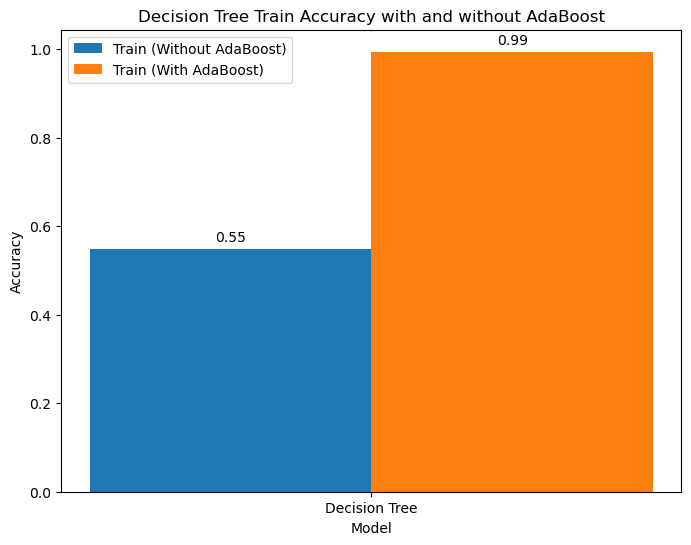

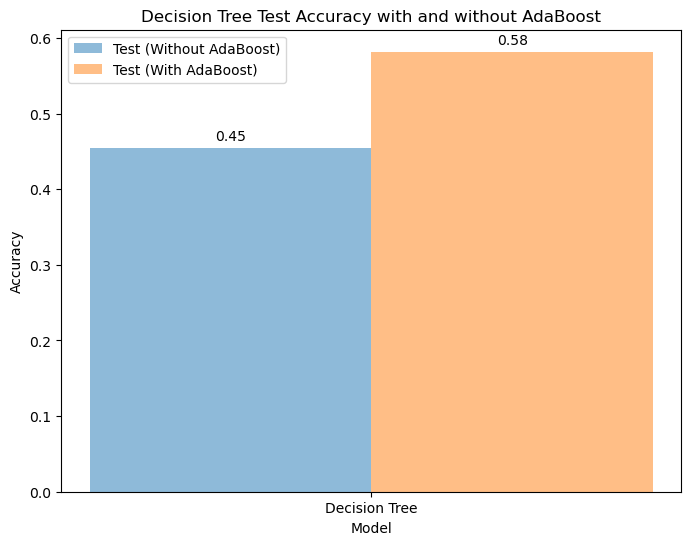

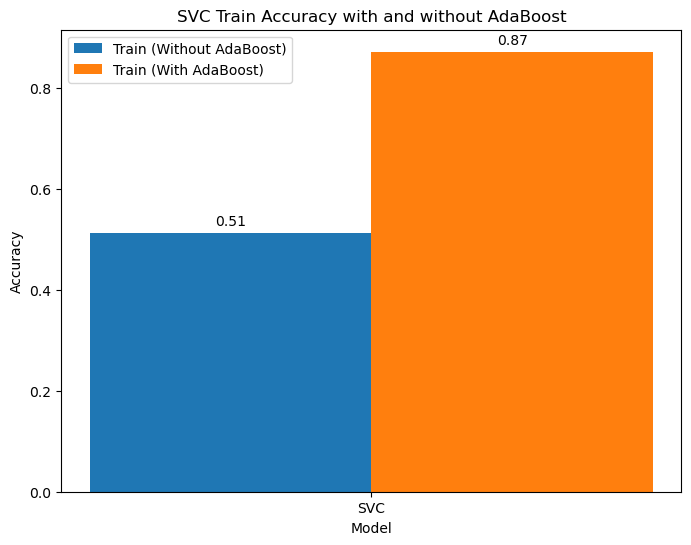

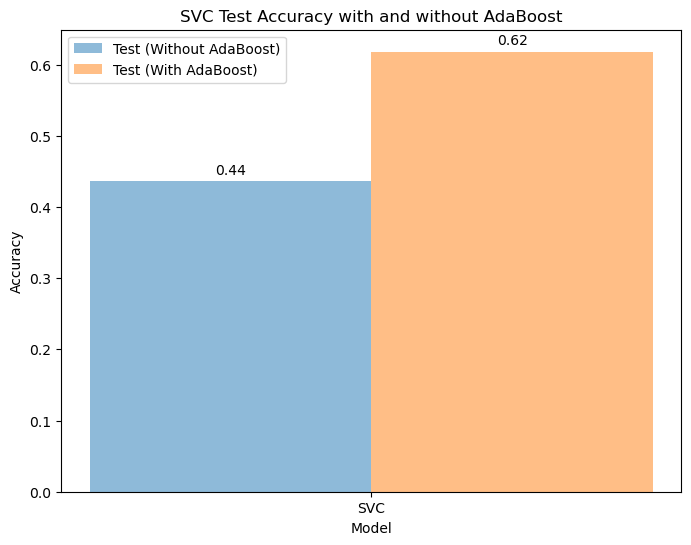

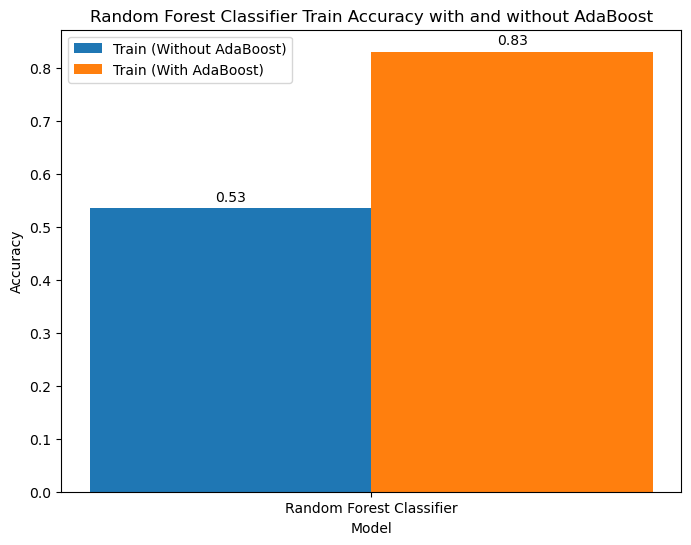

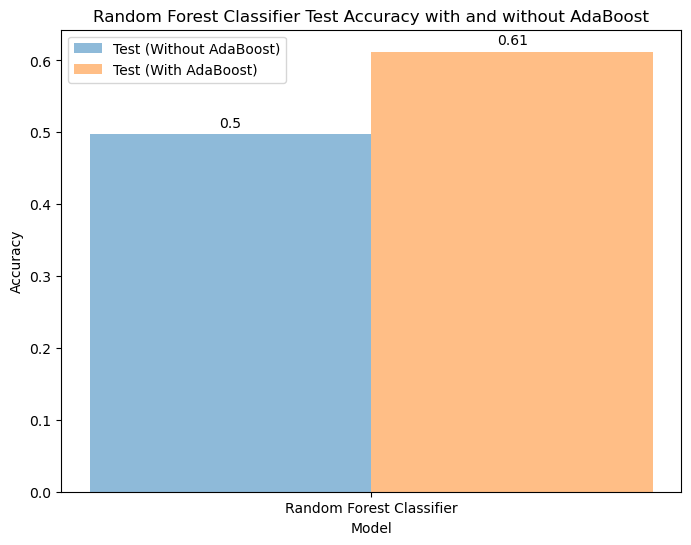

In [23]:
# Organiser les précisions d'entraînement et de test pour chaque modèle
train_accuracies_dt_without = [train_accuracy_dt_without]
train_accuracies_dt_with = [train_accuracy_dt_with]
test_accuracies_dt_without = [test_accuracy_dt_without]
test_accuracies_dt_with = [test_accuracy_dt_with]

train_accuracies_svc_without = [train_accuracy_svc_without]
train_accuracies_svc_with = [train_accuracy_svc_with]
test_accuracies_svc_without = [test_accuracy_svc_without]
test_accuracies_svc_with = [test_accuracy_svc_with]

train_accuracies_rfc_without = [train_accuracy_rfc_without]
train_accuracies_rfc_with = [train_accuracy_rfc_with]
test_accuracies_rfc_without = [test_accuracy_rfc_without]
test_accuracies_rfc_with = [test_accuracy_rfc_with]

# Appeler la fonction plot_accuracies pour chaque modèle
plot_accuracies(train_accuracies_dt_without, train_accuracies_dt_with,
                test_accuracies_dt_without, test_accuracies_dt_with,
                "Decision Tree")

plot_accuracies(train_accuracies_svc_without, train_accuracies_svc_with,
                test_accuracies_svc_without, test_accuracies_svc_with,
                "SVC")

plot_accuracies(train_accuracies_rfc_without, train_accuracies_rfc_with,
                test_accuracies_rfc_without, test_accuracies_rfc_with,
                "Random Forest Classifier")


c:\Users\Moi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Moi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


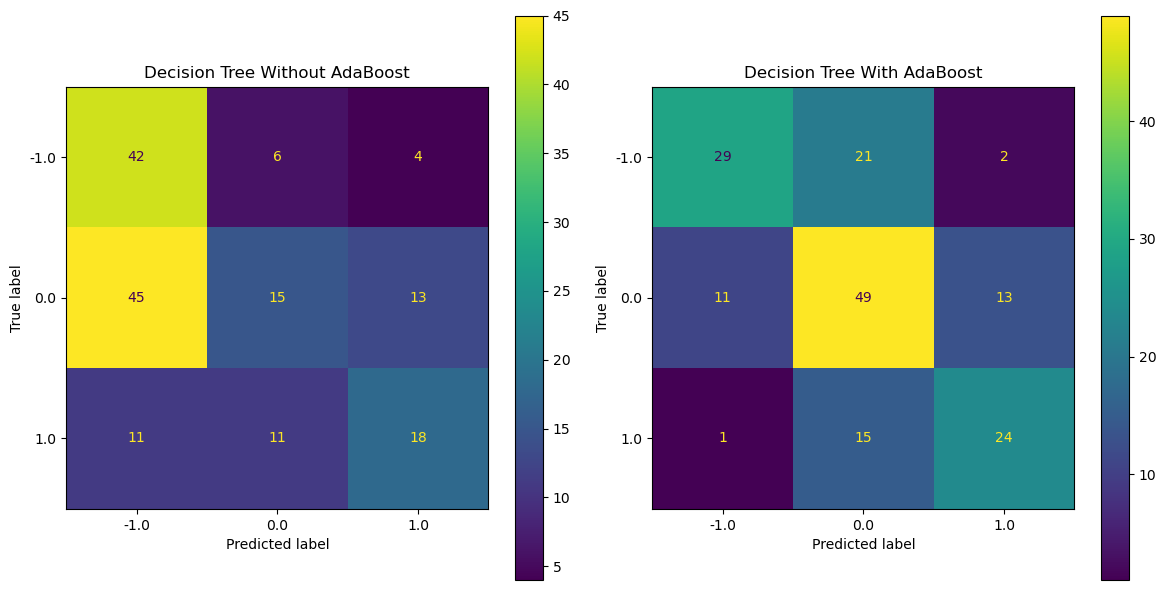

c:\Users\Moi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Moi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


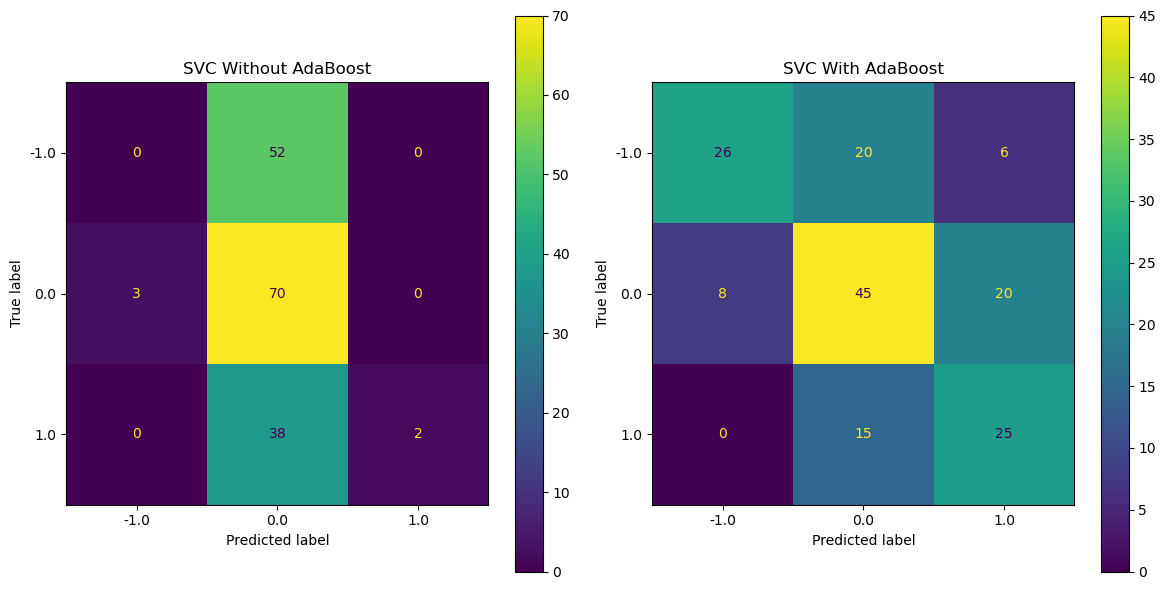

c:\Users\Moi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Moi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


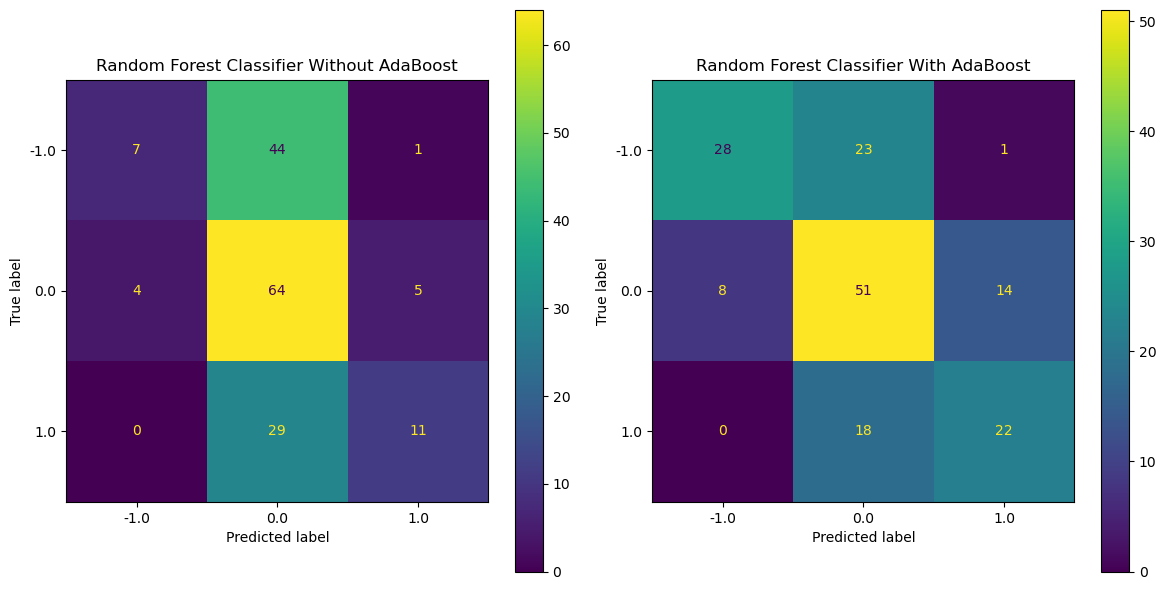

In [24]:
from sklearn.metrics import plot_confusion_matrix

# Définir les modèles
models = {
    "Decision Tree": dt,
    "SVC": svc,
    "Random Forest Classifier": rfc
}
adaboost_models = {
    "Decision Tree": adaboost_dt,
    "SVC": adaboost_svc,
    "Random Forest Classifier": adaboost_rfc
}
# Afficher les matrices de confusion pour chaque modèle avec et sans AdaBoost
for model_name, model in models.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Sans AdaBoost
    plot_confusion_matrix(model, x_test, y_test, ax=axes[0])
    axes[0].set_title(f'{model_name} Without AdaBoost')
    
    # Avec AdaBoost
    plot_confusion_matrix(adaboost_models[model_name], x_test, y_test, ax=axes[1])
    axes[1].set_title(f'{model_name} With AdaBoost')
    
    plt.tight_layout()
    plt.show()


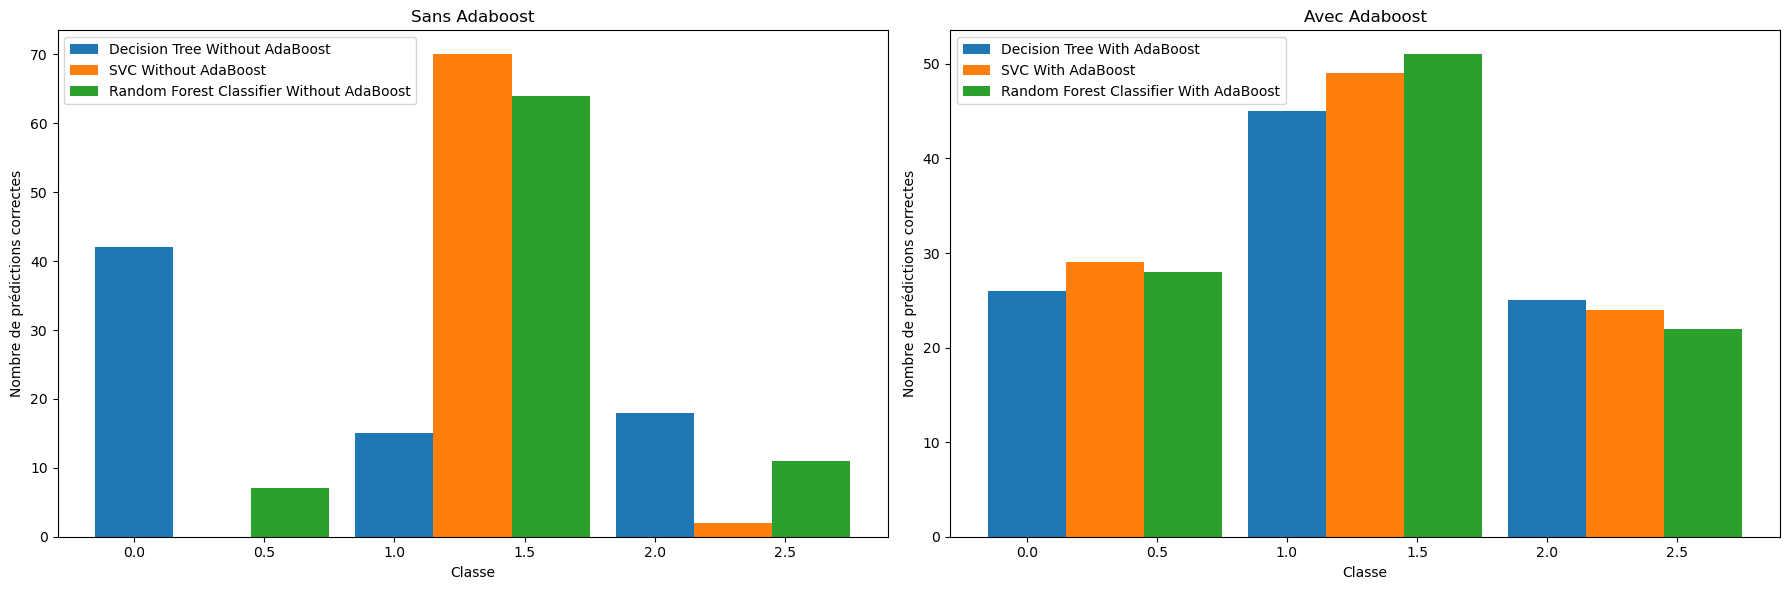

In [25]:
# Collecte des prédictions pour chaque modèle et chaque type d'Adaboost
predictions = {
    "Decision Tree": {
        "Without AdaBoost": y_pred_without_adaboost_dt,
        "With AdaBoost": y_pred_dt
    },
    "SVC": {
        "Without AdaBoost": y_pred_without_adaboost_svc,
        "With AdaBoost": y_pred_svc
    },
    "Random Forest Classifier": {
        "Without AdaBoost": y_pred_without_adaboost_rfc,
        "With AdaBoost": y_pred_rfc
    }
}

# Valeurs réelles (la vérité)
true_values = y_test

# Initialisation des compteurs pour chaque classe et chaque modèle
counters = {model_name: {adaboost_type: {true_val: 0 for true_val in [-1, 0, 1]} for adaboost_type in ["Without AdaBoost", "With AdaBoost"]} for model_name in predictions.keys()}

# Compter les prédictions correctes pour chaque classe et chaque modèle
for model_name, model_data in predictions.items():
    for adaboost_type, preds in model_data.items():
        for pred, true_val in zip(preds, true_values):
            if pred == true_val:
                counters[model_name][adaboost_type][true_val] += 1

# Création des trois graphiques à barres
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot des résultats pour chaque modèle et chaque type d'Adaboost pour chaque classe
for i, (model_name, model_data) in enumerate(counters.items()):
    for j, adaboost_type in enumerate(["Without AdaBoost", "With AdaBoost"]):
        ax = axes[j]
        ax.bar(np.arange(len([-1, 0, 1])) + i * 0.3, list(model_data[adaboost_type].values()), width=0.3, label=f"{model_name} {adaboost_type}")

# Configurations des graphiques
for ax in axes:
    ax.set_xlabel('Classe')
    ax.set_ylabel('Nombre de prédictions correctes')
    ax.legend()

axes[0].set_title('Sans Adaboost')
axes[1].set_title('Avec Adaboost')

plt.tight_layout()
plt.show()


-- decision tree with adaboost and n_estimators=5 --
Train accuracy is 0.7194029850746269
Test accuracy is 0.4727272727272727
-- decision tree with adaboost and n_estimators=10 --
Train accuracy is 0.8119402985074626
Test accuracy is 0.49696969696969695
-- decision tree with adaboost and n_estimators=15 --
Train accuracy is 0.8925373134328358
Test accuracy is 0.4666666666666667
-- decision tree with adaboost and n_estimators=20 --
Train accuracy is 0.9104477611940298
Test accuracy is 0.49696969696969695
-- decision tree with adaboost and n_estimators=25 --
Train accuracy is 0.9223880597014925
Test accuracy is 0.4909090909090909
-- decision tree with adaboost and n_estimators=30 --
Train accuracy is 0.9522388059701492
Test accuracy is 0.5575757575757576
-- decision tree with adaboost and n_estimators=35 --
Train accuracy is 0.9641791044776119
Test accuracy is 0.5575757575757576
-- decision tree with adaboost and n_estimators=40 --
Train accuracy is 0.9731343283582089
Test accuracy is 0.

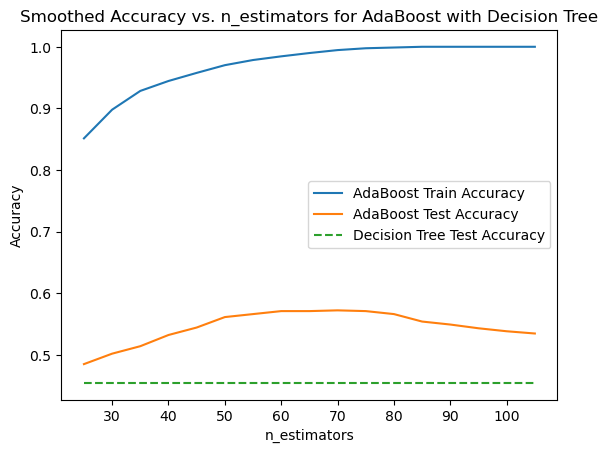

In [29]:

# Initialisation des paramètres
n_estimators_values = [5,10,15, 20,25, 30,35, 40,45, 50,55, 60,65, 70,75, 80,85, 90,95, 100, 105]
train_accuracies = []
test_accuracies = []
decision_tree_train_accuracies = []
decision_tree_test_accuracies = []

# Création du classifieur de l'arbre de décision
dt = DecisionTreeClassifier(max_depth=4, random_state=0)
dt.fit(x_train, y_train)

# Fonction pour évaluer l'accuracy en fonction de n_estimators
def adaboost_decision_tree_accuracies(n_estimators):
    print(f"-- decision tree with adaboost and n_estimators={n_estimators} --")
    ada_boost = AdaBoostClassifier(base_estimator=dt, n_estimators=n_estimators, learning_rate=0.2, random_state=42)
    ada_boost.fit(x_train, y_train)
    
    train_accuracy = ada_boost.score(x_train, y_train)
    test_accuracy = ada_boost.score(x_test, y_test)
    
    print(f'Train accuracy is {train_accuracy}')
    print(f'Test accuracy is {test_accuracy}')
    
    return train_accuracy, test_accuracy

# Accuracy du Decision Tree seul
for _ in n_estimators_values:
    dt_train_accuracy = dt.score(x_train, y_train)
    dt_test_accuracy = dt.score(x_test, y_test)
    decision_tree_train_accuracies.append(dt_train_accuracy)
    decision_tree_test_accuracies.append(dt_test_accuracy)

# Boucle sur les différentes valeurs de n_estimators
for n_estimators in n_estimators_values:
    train_accuracy, test_accuracy = adaboost_decision_tree_accuracies(n_estimators)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Lissage des courbes avec la moyenne mobile
window_size = 5  # Taille de la fenêtre de moyenne mobile
train_accuracies_smoothed = np.convolve(train_accuracies, np.ones(window_size) / window_size, mode='valid')
test_accuracies_smoothed = np.convolve(test_accuracies, np.ones(window_size) / window_size, mode='valid')
decision_tree_train_accuracies_smoothed = np.convolve(decision_tree_train_accuracies, np.ones(window_size) / window_size, mode='valid')
decision_tree_test_accuracies_smoothed = np.convolve(decision_tree_test_accuracies, np.ones(window_size) / window_size, mode='valid')
n_estimators_smoothed = n_estimators_values[window_size-1:]

# Tracer l'accuracy lissée en fonction de n_estimators
plt.plot(n_estimators_smoothed, train_accuracies_smoothed, label='AdaBoost Train Accuracy')
plt.plot(n_estimators_smoothed, test_accuracies_smoothed, label='AdaBoost Test Accuracy')
plt.plot(n_estimators_smoothed, decision_tree_test_accuracies_smoothed, label='Decision Tree Test Accuracy', linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Smoothed Accuracy vs. n_estimators for AdaBoost with Decision Tree')
plt.legend()
plt.show()


-- Decision Tree with adaboost and learning_rate=0.001 --
Train accuracy is 0.582089552238806
Test accuracy is 0.47878787878787876
-- Decision Tree with adaboost and learning_rate=0.005 --
Train accuracy is 0.6805970149253732
Test accuracy is 0.4909090909090909
-- Decision Tree with adaboost and learning_rate=0.01 --
Train accuracy is 0.6895522388059702
Test accuracy is 0.49696969696969695
-- Decision Tree with adaboost and learning_rate=0.02 --
Train accuracy is 0.817910447761194
Test accuracy is 0.5151515151515151
-- Decision Tree with adaboost and learning_rate=0.05 --
Train accuracy is 0.9313432835820895
Test accuracy is 0.4909090909090909
-- Decision Tree with adaboost and learning_rate=0.09 --
Train accuracy is 0.9850746268656716
Test accuracy is 0.509090909090909
-- Decision Tree with adaboost and learning_rate=0.1 --
Train accuracy is 0.9731343283582089
Test accuracy is 0.5333333333333333
-- Decision Tree with adaboost and learning_rate=0.2 --
Train accuracy is 0.99402985074626

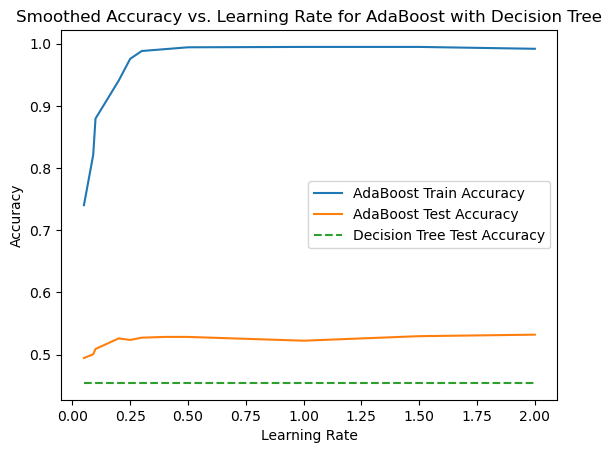

In [28]:

# Initialisation des paramètres
learning_rate_values = [0.001, 0.005, 0.01,0.02, 0.05,0.09, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 1, 1.5,2]
train_accuracies = []
test_accuracies = []
dt_train_accuracies = []
dt_test_accuracies = []

# Création du classifieur Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=0)
dt.fit(x_train, y_train)

# Fonction pour évaluer l'accuracy en fonction du learning_rate
def adaboost_dt_accuracies(learning_rate):
    print(f"-- Decision Tree with adaboost and learning_rate={learning_rate} --")
    ada_boost = AdaBoostClassifier(base_estimator=dt, n_estimators=55, learning_rate=learning_rate, random_state=42)
    ada_boost.fit(x_train, y_train)
    
    train_accuracy = ada_boost.score(x_train, y_train)
    test_accuracy = ada_boost.score(x_test, y_test)
    
    print(f'Train accuracy is {train_accuracy}')
    print(f'Test accuracy is {test_accuracy}')
    
    return train_accuracy, test_accuracy

# Accuracy du Decision Tree seul
for _ in learning_rate_values:
    dt_train_accuracy = dt.score(x_train, y_train)
    dt_test_accuracy = dt.score(x_test, y_test)
    dt_train_accuracies.append(dt_train_accuracy)
    dt_test_accuracies.append(dt_test_accuracy)

# Boucle sur les différentes valeurs de learning_rate
for learning_rate in learning_rate_values:
    train_accuracy, test_accuracy = adaboost_dt_accuracies(learning_rate)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Fonction pour lisser les courbes avec une moyenne mobile
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Définition de la taille de la fenêtre pour la moyenne mobile
window_size = 5

# Lissage des courbes
smoothed_train_accuracies = moving_average(train_accuracies, window_size)
smoothed_test_accuracies = moving_average(test_accuracies, window_size)
smoothed_dt_train_accuracies = moving_average(dt_train_accuracies, window_size)
smoothed_dt_test_accuracies = moving_average(dt_test_accuracies, window_size)

# Tracer l'accuracy lissée en fonction du learning_rate
plt.plot(learning_rate_values[window_size-1:], smoothed_train_accuracies, label='AdaBoost Train Accuracy')
plt.plot(learning_rate_values[window_size-1:], smoothed_test_accuracies, label='AdaBoost Test Accuracy')
plt.plot(learning_rate_values[window_size-1:], smoothed_dt_test_accuracies, label='Decision Tree Test Accuracy', linestyle='--')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Smoothed Accuracy vs. Learning Rate for AdaBoost with Decision Tree')
plt.legend()
plt.show()


Now explore the performances of the KNN classifier with other maze dimentions and number of cheeses..